## Соревнонавние с Kaggle 2
https://inclass.kaggle.com/c/product-reviews-sentiment-analysis

In [1]:
import requests
import bs4
import numpy as np
import pandas as pd
import scrapy

Загрузка тестовой выборки

In [2]:
test = None

with open('sent_test.csv', 'r') as inf:
    test = inf.read()

In [36]:
test

'<review>Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.\nНесколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.\n</review>\n\n<review>ценанадежность-неубиваемостьдолго держит батарею 4 дня стабильно как телефон, 3-4 как плеер если \nпостоянно долбиться в уши и звонить по паре часо на дню, игры и, конечно,  смс , в месяц около 200 шт набирается.\n Максимальное время работы 5 дней в щадящем режиме.2 simqwerty рулит -после нее набор смс н

Распарсим ее

In [3]:
parser = bs4.BeautifulSoup(test, 'lxml')

In [11]:
parser

<html><body><review>Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.
Несколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.
</review>
<review>ценанадежность-неубиваемостьдолго держит батарею 4 дня стабильно как телефон, 3-4 как плеер если 
постоянно долбиться в уши и звонить по паре часо на дню, игры и, конечно,  смс , в месяц около 200 шт набирается.
 Максимальное время работы 5 дней в щадящем режиме.2 simqwerty рулит -после нее набор с

In [4]:
tmp = parser.findAll('review')

In [5]:
tmp[0].text

'Ужасно слабый аккумулятор, это основной минус этого аппарата, разряжается буквально за пару часов при включенном wifi и на макс подсветке, например если играть или смотреть видео, следовательно использовать можно только если есть постоянная возможность подзарядиться. Качества звука через динамик далеко не на высоте.Наблюдаются незначительные тормоза в некоторых приложениях и вообще в меню. Очень мало встроенной памяти, а приложения устанавливаются именно туда, с этим связанны неудобства - нужно постоянно переносить их на карту памяти.\nНесколько неудобно что нету отдельной кнопки для фото. Подумываю купить батарею большей емкость мб что нибудь измениться.\n'

Необходимо собрать дополнительные данные с сайтов, где есть готовая  разметка отзывов. Попробуем Yandex market.

In [14]:
url_list = ['https://market.yandex.ru/product--smartfon-samsung-galaxy-a9-2018-6-128gb/201855059/reviews?hid=91491&page=1', 
            'https://market.yandex.ru/product--smartfon-samsung-galaxy-a9-2018-6-128gb/201855059/reviews?hid=91491&page=2']
url_list += ['https://market.yandex.ru/product--smartfon-nokia-5/1720217038/reviews?hid=91491&page=' + str(p) for p in range(1, 24)]
url_list += ['https://market.yandex.ru/product--smartfon-sony-xperia-xa/13486418/reviews?hid=91491&page=' + str(p) for p in range(1, 24)]
url_list += ['https://market.yandex.ru/product--smartfon-zte-blade-a510/13941498/reviews?hid=91491&page=' + str(p) for p in range(1, 11)]

In [8]:
req = requests.get('https://market.yandex.ru/product--smartfon-samsung-galaxy-a9-2018-6-128gb/201855059/reviews?hid=91491&page=1')

In [140]:
url_list

['https://market.yandex.ru/product--smartfon-samsung-galaxy-a9-2018-6-128gb/201855059/reviews?hid=91491&page=1',
 'https://market.yandex.ru/product--smartfon-samsung-galaxy-a9-2018-6-128gb/201855059/reviews?hid=91491&page=2',
 'https://market.yandex.ru/product--smartfon-nokia-5/1720217038/reviews?hid=91491&page=1',
 'https://market.yandex.ru/product--smartfon-nokia-5/1720217038/reviews?hid=91491&page=2',
 'https://market.yandex.ru/product--smartfon-nokia-5/1720217038/reviews?hid=91491&page=3',
 'https://market.yandex.ru/product--smartfon-nokia-5/1720217038/reviews?hid=91491&page=4',
 'https://market.yandex.ru/product--smartfon-nokia-5/1720217038/reviews?hid=91491&page=5',
 'https://market.yandex.ru/product--smartfon-nokia-5/1720217038/reviews?hid=91491&page=6',
 'https://market.yandex.ru/product--smartfon-nokia-5/1720217038/reviews?hid=91491&page=7',
 'https://market.yandex.ru/product--smartfon-nokia-5/1720217038/reviews?hid=91491&page=8',
 'https://market.yandex.ru/product--smartfon-n

In [9]:
parser = bs4.BeautifulSoup(req.text, 'lxml')

Разберемся с HTML структурой отзыва

In [37]:
parser

<!DOCTYPE html>
<html class="i-ua_js_no i-ua_css_standard i-ua_os-family_unknown i-ua_browser-engine_unknown i-ua_browser-name_unknown i-ua_placeholder_yes" lang="ru" prefix="og: http://ogp.me/ns#"><head><meta content="always" name="referrer"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="SKYPE_TOOLBAR_PARSER_COMPATIBLE" name="SKYPE_TOOLBAR"/><meta content="true" name="MSSmartTagsPreventParsing"/><meta content="Смартфон Samsung Galaxy A9 (2018) 6/128GB: отзывы покупателей на Яндекс.Маркете. Достоинства и недостатки товара, оценки по характеристикам: экран, время автономной работы, производительность, камера, объем памяти. 37% пользователей, оставивших оценки, рекомендуют этот товар. Важная информация о товаре Смартфон Samsung Galaxy A9 (2018) 6/128GB: описание, фотографии, цены, варианты доставки, магазины на карте." name="description"/><link href="//yastatic.net/market-export/_/i/favicon.ico" rel="shortcut icon"/><link href="//yastatic.net/market-export/_/i/favi

In [45]:
rews = parser.findAll('div', attrs={'itemprop':'review'})

In [52]:
rews[1]

<div itemprop="review" itemscope="" itemtype="https://schema.org/Review"><meta content="2018-12-31" itemprop="datePublished"/><meta content="Пользователь скрыл свои данные" itemprop="author"/><meta content="Достоинства: Большой экран, хорошая автономность, отзывчивый интерфейс, наличие широкоугольного объектива. Недостатки: Камера. Комментарий: Неплохой смартфон в качестве звонилки. Шустрый, много оперативной памяти, оболочка не тормозит совсем, все очень быстро. Уверенная связь, хороший разговорный динамик. Основной недостаток - камера. Снимает на уровне китайского Xiaomi redmi note5, и то если снимать в режиме 12 МП. Воткнутые от балды 4 камеры))) Они там не нужны. Реально нужны только 2, с обычным фокусным расстоянием и широкоугольным. 24 МП - маркетинг. Никаких реальных таких пикселей там нет и в помине. Если принудительно поставить режим 12 МП, тогда становится похож на бюджетных китайцев. Единственное достоинство есть ширик, разрешение данной камеры всего 8 МП. Но когда помещение

In [82]:
rews[5].contents[2]['content']

'Достоинства: Ну это вроде как Samsung... Внешний вид и всё такое прочее... Будет коцаться или нет пока не знаю. Но если любите почитать в ванной - это не ваш вариант.  Недостатки: Камер много, но все подлагивают и если слегка надавить на стекляшку, что их прикрывает то есть опасение, что она треснет!?...  Комментарий: За 10 - 12 тыс. Рублей вполне приличный бюджетник, но за такие деньги можно приобрести к примеру качественный китайский флагман (напр. Рocophon F1 на процессоре Snapdragon 845 иди Honor Play на Кirin 970)это 18-20 тыс. Рублей и в придачу купить планшет от всё той же Xiaomi, например Mi Pad 4 (на чипе Snapdragon 660, том самом, что и в данном самсунге и стоимость в нашей стране 12-17тыс.рублей /WiFi - LTE) Выводы каждый делает сам... '

In [5]:
ratings = parser.findAll('div', attrs={'itemprop':'reviewRating'})

In [89]:
ratings[0].contents[0]['content']

'2'

Функция для парсинга

In [6]:
import time 

def ParseURLs(URLs):
    texts = []
    rts = []
    for url in URLs:
        req = requests.get(url)
        parser = bs4.BeautifulSoup(req.text, 'lxml')
        
        revs = parser.findAll('div', attrs={'itemprop':'review'})
        ratings = parser.findAll('div', attrs={'itemprop':'reviewRating'})
        
        for i in range(len(revs)):
            texts.append(revs[i].contents[2]['content'])
            rts.append(int(ratings[i].contents[0]['content']))
        time.sleep(2)
        
    
    return texts, rts

In [17]:
%%time
txts, rats = ParseURLs(url_list)

CPU times: user 26.6 s, sys: 2.05 s, total: 28.7 s
Wall time: 3min 20s


In [12]:
for t in txts[:10]:
    print(t)
    print('________//_______')

Достоинства: - Автономность работы - Объем памяти на борту - Функция быстрой зарядки - Расцветка позаимствованная у Хуавей p20 pro  Недостатки: - SoC (процессор и графическое ядро) snapdragon 660 (Привет Сяоми Ми А2, за 16 тыс рублей; BQ, Meidzu 15 за 15 тыс рублей, Nubia Z18 mini за 10к с али и т.д.); - отсутствие пылевлагозащиты; - отсутствие оптической стабилизации; - отсутствие желания покупать его за 39.990 - цена 39.990 - желание его выкинуть в мусорное ведро, если вы взяли у знакомого пофоткать или просто погонять s8 заааа *фанфары* 39.990 и 33.500 если это не РСТ версия - КАМЕРА (подробнее в комментариях) Комментарий: Попробую сказать так: "Представьте себе а7 2018, прочитайте мой отзыв, наложите сюда и никогда-никогда-никогда не покупайте этот смартфон пока цена на него не упадет до разумных 22 тыс рублей, как это произошло с А8/A8+" Что в нем плохого? Да как бы особо ничего. Что в нем хорошего на 39990? Ничего вообще. Это смартфон который полностью копирует А8+, за исключение

In [18]:
data = pd.DataFrame(np.hstack((np.array(txts).reshape(-1, 1), np.array(rats).reshape(-1, 1))), columns=['text', 'rating'])

In [19]:
data.head()

,text,rating
0,Достоинства: - Автономность работы - Объем пам...,2
1,"Достоинства: Большой экран, хорошая автономнос...",3
2,Достоинства: Он сам одно достоинство. Отличный...,5
3,Достоинства: Шустрый хорошо и плавно тащит обо...,3
4,"Достоинства: Понравились 4 камеры, выглядят кр...",2


In [20]:
data.tail()

,text,rating
369,Достоинства: Недостатки: Очень осталась недов...,1
370,"Достоинства: красивый,стильный,легкий, камера ...",5
371,Достоинства: Их нет Недостатки: Пропадает 4g. ...,1
372,"Достоинства: 1. Камера (13/5 мегапикселей), сн...",4
373,Достоинства: Симпатичный. Недостатки: Часто ви...,3


In [21]:
data['IsPositive'] = (data['rating'].astype(int) > 3).astype(int)

In [11]:
len(data[data['rating'] != 3])

298

In [84]:
data

,text,rating,IsPositive
5,Достоинства: Ну это вроде как Samsung... Внешн...,1,0
9,Достоинства: Качество экрана. Автономность при...,1,0
32,"Достоинства: Когда в телефоне всё работает, он...",1,0
39,Достоинства: Корпус и стекло (внешний вид дост...,1,0
48,"Достоинства: Очень долго держит зарядку, подде...",1,0
50,"Достоинства: Внешний вид , андроид 8 Недостатк...",1,0
79,"Достоинства: Цена,внешний вид. Недостатки: Зав...",1,0
81,"Достоинства: Датчик отпечатка пальцев, цена не...",1,0
83,Достоинства: Покрытие экрана Шустрый (на Андро...,1,0
100,Достоинства: Нет Недостатки: Постоянно зависае...,1,0


In [85]:
data['IsPositive'].values.sum()

134

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

Распределение отзывов в выборке без нейтральных

(array([ 50.,   0.,  45.,   0.,   0.,   0.,   0.,  69.,   0., 134.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

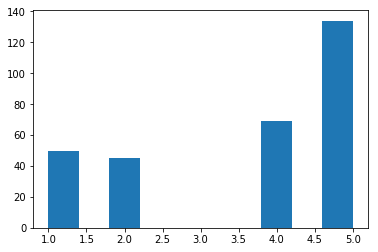

In [9]:
plt.hist(data['rating'].values.astype(int))

Cчитаем, что отзыв положителен, если его оценка <= 4. Возможно стоило вообще выбросить отзывы с оценкой 3, т.к. они скорее всего нейтральны, но так получилось равномерное распределение клссов. Попробуем так, вдруг получится.

In [27]:
#data.to_csv('Parsed_data.csv', index=None)

In [7]:
data = pd.read_csv('Parsed_data.csv')
data = data[data['rating'] != 3]

In [29]:
data.head()

,text,rating,IsPositive
0,Достоинства: - Автономность работы - Объем пам...,2,0
1,"Достоинства: Большой экран, хорошая автономнос...",3,0
2,Достоинства: Он сам одно достоинство. Отличный...,5,1
3,Достоинства: Шустрый хорошо и плавно тащит обо...,3,0
4,"Достоинства: Понравились 4 камеры, выглядят кр...",2,0


Перейдем к подбору модели, на соновании имеющегося опыта попробуем комбинацию LR + CountVec и SVM + Tfidf

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [11]:
CntLR_pipeline = Pipeline(
    [
        ('CNT', CountVectorizer()),
        ('LR', LogisticRegression())
    ]
)

TfSVM_pipeline = Pipeline(
    [
        ('Tfidf', TfidfVectorizer()),
        ('SVM', LinearSVC())
    ]
)

CntLR_params = {
    'CNT__ngram_range': [(1, 1), (1, 2)],
    'CNT__stop_words': [None],
    'LR__C': np.arange(0.6, 1, 15),
    'LR__class_weight': [{0: 0.7, 1: 0.3}, {0: 0.5, 1: 0.5}, {0: 0.65, 1: 0.35}],
    'LR__penalty': ['l2', 'l1']
}

TfSVM_params = {
    'Tfidf__ngram_range': [(1, 1), (1, 2)],
    'Tfidf__stop_words': [None],
    'SVM__C': np.arange(0.75, 1.4, 15),
    'SVM__class_weight': [{0: 0.67, 1: 0.33}, {0: 0.765, 1: 0.235}]
    #'SVM__penalty': ['l2', 'l1']
}


In [12]:
###0.875
TfSVM_params = {
    'Tfidf__ngram_range': [(1, 1), (1, 2)],
    'Tfidf__stop_words': [None],
    'SVM__C': np.arange(0.7, 1.4, 15),
    'SVM__class_weight': [{0: 0.67, 1: 0.33}, {0: 0.765, 1: 0.235}]
    #'SVM__penalty': ['l2', 'l1']
}


In [16]:
from sklearn.utils import shuffle

data = shuffle(data)
X_train = data['text'].values
y_train = data['IsPositive'].values

In [28]:
%%time
CntLR_grid = GridSearchCV(CntLR_pipeline, cv=5, param_grid=CntLR_params) 
CntLR_grid.fit(X_train, y_train)

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 45.9 s, sys: 740 ms, total: 46.7 s
Wall time: 47.2 s


In [17]:
%%time
TfSVM_grid = GridSearchCV(TfSVM_pipeline, cv=5, param_grid=TfSVM_params, return_train_score='accuracy') 
TfSVM_grid.fit(X_train, y_train)

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 8.02 s, sys: 200 ms, total: 8.22 s
Wall time: 8.3 s


In [61]:
CntLR_grid.best_score_

0.8187919463087249

In [18]:
TfSVM_grid.best_score_

0.8456375838926175

In [76]:
best_est = TfSVM_grid.best_estimator_

In [77]:
best_est.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('Tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
 ...e', max_iter=1000, multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0))])

In [90]:
TfSVM_grid.best_params_

{'SVM__C': 0.7,
 'SVM__class_weight': {0: 0.76500000000000001, 1: 0.23499999999999999},
 'Tfidf__ngram_range': (1, 2),
 'Tfidf__stop_words': None}

In [79]:
preds = best_est.predict([x.text for x in tmp])

In [80]:
np.sum(preds)

49

In [81]:
preds = list(map(lambda x: 'neg' if x == 0 else 'pos', preds))

In [82]:
res = pd.DataFrame(np.hstack((np.arange(0, len(preds)).reshape(-1, 1), np.array(preds).reshape(-1, 1))), columns=['Id', 'y'])

In [83]:
res.y.sum()

'negposnegnegnegposnegposposnegnegposnegposposposposnegposposposnegnegposposnegposposnegposnegposnegposnegposposnegposnegposposposnegnegposposposnegnegnegnegnegnegposposposposposposnegposnegnegnegnegnegnegnegposposnegnegnegnegposnegnegnegnegnegposnegnegposnegposposposnegposposnegposnegnegposnegpospos'

In [164]:
res.y.sum()

'posposnegnegposposnegposposnegnegposposposposposposnegposposposposnegposposnegposposnegposnegposnegposnegposposposposnegposposposnegnegposposposposnegposnegnegposposposposposposposnegposposnegnegnegnegnegnegposposnegnegposnegposnegnegposposnegnegnegnegposnegposposposnegposposnegposnegnegpospospospos'

In [84]:
res.to_csv('SentRes2.csv', index=False)

In [89]:
tmp[3].text

'я любительница громкой музыки. Тише телефона у меня еще не было!! Приложений мало, память маленькая. Толком ни чего скачать не можешь. Вечно приходится что то удалять. Бывало такое что сенсор заедал без особых на то причин. Телефону 1,5 месяца.\nЕсть телефоны намного лучше. НЕ БЕРИТЕ !!! Я пожалела...\n'

Уберем оценки 3

In [36]:
data = data[data['rating'] != 3]

In [37]:
CntLR_grid.best_score_

0.8056537102473498

In [38]:
TfSVM_grid.best_score_

0.6819787985865724

Попробуем еще сочитание

In [94]:
CntSVM_pipeline = Pipeline(
    [
        ('CNT', CountVectorizer()),
        ('TDF', TfidfTransformer()),
        ('SVM', LinearSVC())
    ]
)

CntSVM_params = {
    'CNT__ngram_range': [(1, 2), (1, 3)],
    'CNT__stop_words': [None, 'english'],
    'TDF__norm': ['l1', 'l2'],
    'SVM__C': np.arange(0.5, 1.1, 15),
    'SVM__class_weight': [{0: 0.5, 1: 0.5}, {0: 0.4, 1: 0.6}, {0: 0.6, 1: 0.4}],
}

In [95]:
%%time
CntSVM_grid = GridSearchCV(CntSVM_pipeline, cv=5, param_grid=CntSVM_params) 
CntSVM_grid.fit(X_train, y_train)

CPU times: user 32.8 s, sys: 870 ms, total: 33.7 s
Wall time: 34.1 s


/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [96]:
CntSVM_grid.best_score_

0.7815126050420168

In [78]:
y_train.sum()

193

In [79]:
y_train.shape

(283,)